In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [57]:
data_train.shape

(891, 12)

In [58]:
# to display all rows
pd.set_option('display.max_rows',None)

# TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns', None) 

In [59]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [60]:
# data_train['Fare'].value_counts()
# max(data_train.Age)
# 1-20, 20-40, 40-800
# data_train.Age.value_counts()

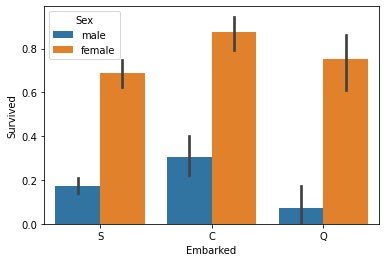

In [61]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)

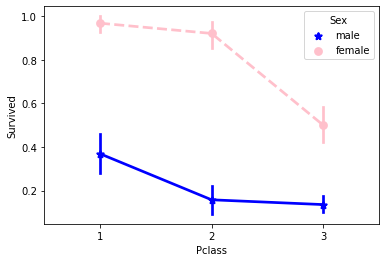

In [62]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [63]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 20, 40, 60, 100)
    group_names = ['Unknown', 'Teenager', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 20, 40, 800)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked', 'SibSp', 'Parch'], axis=1) # 'SibSp','Parch' No of sibling, Parents/Child

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [64]:
data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Young Adult,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Young Adult,3_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,3_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,1_quartile,N,"Allen,",Mr.


In [65]:
# data_train['NamePrefix'].value_counts()
# data_train.dtypes

In [66]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,0,7,100,19
1,2,1,1,0,4,2,2,182,20
2,3,1,3,0,4,0,7,329,16
3,4,1,1,0,4,2,2,267,20
4,5,0,3,1,4,0,7,15,19


In [67]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [68]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_regression = PolynomialFeatures(degree=4)
# X_train_poly = poly_regression.fit_transform(X_train)

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,y_train)

LinearRegression()

In [69]:
# y_pred = np.round(lr.predict(X_test))
# y_test = np.array(y_test, dtype=float)

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,0.0


In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7932960893854749
